# Common Geospatial Operations & Functions
### Pip install libraries such as Geopandas and descartes

In [1]:
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-e64yqfol
  Using cached https://files.pythonhosted.org/packages/38/b6/b53f19062afd49bb5abd049aeed36f13bf8d57ef8f3fa07a5203531a0252/Shapely-1.6.4.post2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/51/d8/2a97aea07eed6675187c42411bfca30816dfdd6831c125c123bac74f0465/Fiona-1.8.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/cc/b1/5005c3b01309846399a4404cd2a82e094b0046b2a13bb11becc75ba46eab/pyproj-2.0.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/95/dd/fef84cf1678418f241ef542c0288bdf215bdd3e35f1fe03dc5223a2e80ba/click_plugins-1.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e4/be/30a58b4b0733850280d01f8bd132591b4668ed5c7046761098d665ac2174/cligj-0.5.0-py3-none-any.whl
  Stored in directory: /tmp/pip-ephem-wheel-cache-c9gyhm31/wheels/91/24/71/376c9c6719269416835

In [2]:
%matplotlib inline

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

### Read Fire Perimeter Shapefile

- This is the baseline data required for all models - can be used to find whether a fire incident occured at a given location and time
- Geopandas can consume a shapefile like a pandas dataframe
- A Geopandas dataframe has one additional column known as geometry ; All spatial operations are performed w/ this column

In [4]:
fire_peri = gpd.read_file('Fire_Peri.shp')

In [5]:
fire_peri.tail()

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,Shape_Leng,Shape_Area,geometry
20091,20711.0,2017,CA,USF,ENF,FORNI,00023406,2017/08/11 00:00:00.000,2017/08/14 00:00:00.000,14.0,maybe campfire start,7.5,12.267185,8.0,1.0,None,923.961025,4.964354e+04,POLYGON ((-120.2075692544356 38.82391686875685...
20092,20712.0,2017,CA,DOD,MCP,CRISTIANITOS,01702047,2017/06/28 00:00:00.000,2017/06/30 00:00:00.000,9.0,started by RC bicycle,NaN,702.306641,5.0,1.0,None,14502.847837,2.842134e+06,(POLYGON ((-117.5689774386744 33.4394821472451...
20093,20713.0,2014,None,USF,KNF,RIVER,01706227,2014/05/02 00:00:00.000,2014/05/12 00:00:00.000,9.0,"perimeter for 2014, not previously submitted",17.0,16.001045,1.0,1.0,None,1189.931592,6.475393e+04,POLYGON ((-123.0297752774592 41.78151886625032...
20094,20714.0,2014,None,USF,KNF,ETHEL,00005977,2014/08/12 00:00:00.000,2014/09/15 00:00:00.000,1.0,"perimeter for 2014, not previously submitted",13.8,11.619938,6.0,1.0,None,868.597134,4.702422e+04,POLYGON ((-123.2145413517641 41.44424817757383...
20095,20715.0,2016,None,USF,SHF,MILL,00000802,2016/05/19 00:00:00.000,2016/05/20 00:00:00.000,9.0,"perimeter for 2016, not previously submitted",56.0,57.677917,1.0,1.0,None,2526.086042,2.334143e+05,POLYGON ((-122.3306829905509 41.43772946193435...


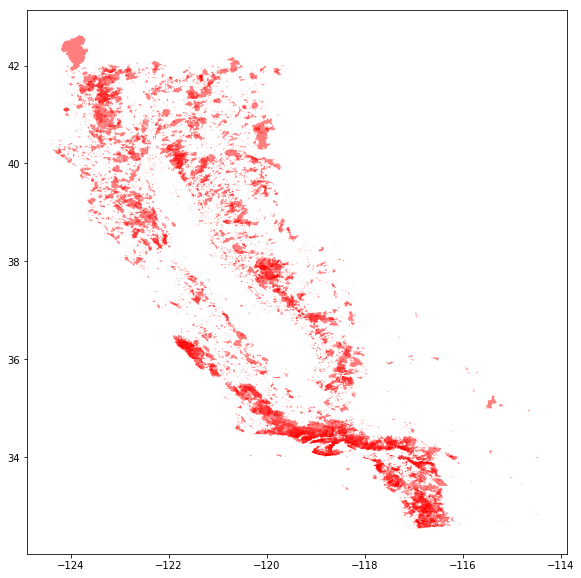

In [6]:
# Performing a simple plot on the Geodataframe will provide us a 
fire_peri.plot(figsize=(15, 10), alpha=0.5, color = 'R')

In [7]:
fire_peri.YEAR_.unique(), len(fire_peri.YEAR_.unique())

(array(['2007', '2005', '2004', '1944', '1915', '1917', '1960', '1921',
        '1923', '1970', '1920', '1979', '1990', '1998', '1966', '1942',
        '1941', '1982', '1973', '1977', '1953', '1946', '1955', '1931',
        '1949', '1964', '1948', '1958', '1972', '1916', '1974', '1950',
        '1930', '1971', '1924', '1926', '1927', '1945', '1952', '1911',
        '1929', None, '1997', '2006', '1984', '1910', '1951', '1956',
        '1981', '1909', '1935', '1936', '1961', '1919', '1925', '1928',
        '1918', '1940', '1933', '1968', '1999', '1943', '1914', '1922',
        '1975', '1932', '1912', '1978', '1983', '1913', '1947', '1934',
        '1937', '1938', '1967', '1976', '2000', '1994', '1954', '1878',
        '1895', '1896', '1898', '1907', '1908', '1986', '1980', '1962',
        '1959', '1900', '1957', '2003', '1969', '1988', '1996', '1991',
        '1992', '1995', '1987', '1939', '2001', '1903', '1905', '1906',
        '1985', '1989', '2002', '1965', '1993', '1963', '2008', '2

**That's a lot of years of data. We probabaly need a better source for date. So we'll try to use the dates from the 'Alarm_Date' and 'Cont_Date' Columns**

In [8]:
fire_peri.dtypes

OBJECTID      float64
YEAR_          object
STATE          object
AGENCY         object
UNIT_ID        object
FIRE_NAME      object
INC_NUM        object
ALARM_DATE     object
CONT_DATE      object
CAUSE         float64
COMMENTS       object
REPORT_AC     float64
GIS_ACRES     float64
C_METHOD      float64
OBJECTIVE     float64
FIRE_NUM       object
Shape_Leng    float64
Shape_Area    float64
geometry       object
dtype: object

### Convert the Alarm_date and Con_date column as datetime

In [9]:
fire_peri['ALARM_DATE'] = pd.to_datetime(fire_peri['ALARM_DATE'], errors='ignore', yearfirst=True)
fire_peri['CONT_DATE'] = pd.to_datetime(fire_peri['CONT_DATE'], errors='ignore', yearfirst=True)

In [10]:
fire_peri.YEAR_ = fire_peri.ALARM_DATE.dt.year

In [11]:
fire_peri.YEAR_.unique(), len(fire_peri.YEAR_.unique())

(array([2007.,   nan, 2006., 2005., 2004., 1944., 1917., 1970., 1979.,
        1990., 1966., 1982., 1973., 1977., 1953., 1955., 1964., 1958.,
        1972., 1974., 1950., 1971., 1916., 1924., 1949., 1945., 1952.,
        1929., 1931., 1997., 1951., 1981., 1935., 1936., 1961., 1927.,
        1960., 1919., 1920., 1928., 1918., 1926., 1968., 1999., 1943.,
        1914., 1975., 1932., 1923., 1933., 1912., 1978., 1983., 1946.,
        1913., 1947., 1930., 1934., 1937., 1941., 1915., 1976., 2000.,
        1910., 1911., 1994., 1898., 1967., 1938., 1925., 1908., 1921.,
        1986., 1980., 1954., 1962., 1959., 1940., 1942., 1957., 2003.,
        1969., 1988., 1922., 1996., 1991., 1992., 1998., 1984., 1995.,
        1987., 1956., 1939., 2001., 1948., 1909., 1903., 1907., 1985.,
        2002., 1965., 1993., 1989., 1963., 2008., 2010., 2016., 2012.,
        2014., 1902., 2009., 2011., 2013., 2015., 2106., 2017., 2018.]), 117)

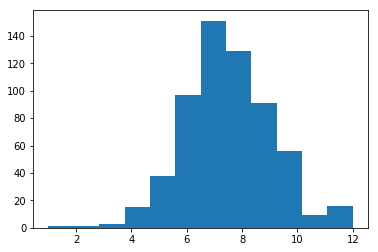

In [12]:
fire_peri[fire_peri["YEAR_"] == 2017]["ALARM_DATE"].dt.month.hist(grid = False, bins = 12)

^^ Indicates maximum fires happened in July

In [13]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [14]:
 def f(x):
    return fire_peri[fire_peri["YEAR_"] == x].plot(figsize=(15, 10), alpha=0.5, edgecolor='k', color = 'r' )

In [15]:
interact(f, x=(2010, 2018, 1));

interactive(children=(IntSlider(value=2014, description='x', max=2018, min=2010), Output()), _dom_classes=('wi…

### Let's try to subset a dataframe just for the year 2017

In [16]:
fire_2017 = fire_peri[fire_peri["YEAR_"] == 2017]
len(fire_2017)

607

In [17]:
fire_2017.describe()

,OBJECTID,YEAR_,CAUSE,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,Shape_Leng,Shape_Area
count,607.000000,607.0,607.000000,452.000000,607.000000,607.000000,607.0,607.000000,6.070000e+02
mean,20408.632619,2017.0,8.108731,2110.461935,2346.885304,2.831960,1.0,10515.189522,9.497508e+06
std,175.890854,0.0,5.248735,14540.795682,14280.884978,2.664044,0.0,34460.648468,5.779269e+07
min,20104.000000,2017.0,1.000000,0.000000,0.001357,1.000000,1.0,11.147546,5.491126e+00
25%,20257.500000,2017.0,2.000000,1.925000,9.566273,1.000000,1.0,933.542497,3.871333e+04
50%,20409.000000,2017.0,9.000000,21.000000,28.703054,1.000000,1.0,1903.053928,1.161571e+05
75%,20560.500000,2017.0,14.000000,140.825000,144.389473,6.000000,1.0,4827.376573,5.843234e+05
max,20712.000000,2017.0,14.000000,281893.000000,281790.875000,8.000000,1.0,445282.444798,1.140367e+09


In [18]:
fire_2017.tail().T

,20088,20089,20090,20091,20092
OBJECTID,20708,20709,20710,20711,20712
YEAR_,2017,2017,2017,2017,2017
STATE,CA,CA,CA,CA,CA
AGENCY,USF,USF,USF,USF,DOD
UNIT_ID,RRS,RRS,INF,ENF,MCP
FIRE_NAME,ABNEY,KNOX,GOODALE,FORNI,CRISTIANITOS
INC_NUM,00000568,00000612,00001157,00023406,01702047
ALARM_DATE,2017-08-10 00:00:00,2017-08-11 00:00:00,2017-07-24 00:00:00,2017-08-11 00:00:00,2017-06-28 00:00:00
CONT_DATE,2018/01/10 00:00:00.000,2017/11/28 00:00:00.000,2017/08/28 00:00:00.000,2017/08/14 00:00:00.000,2017/06/30 00:00:00.000
CAUSE,1,1,1,14,9


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


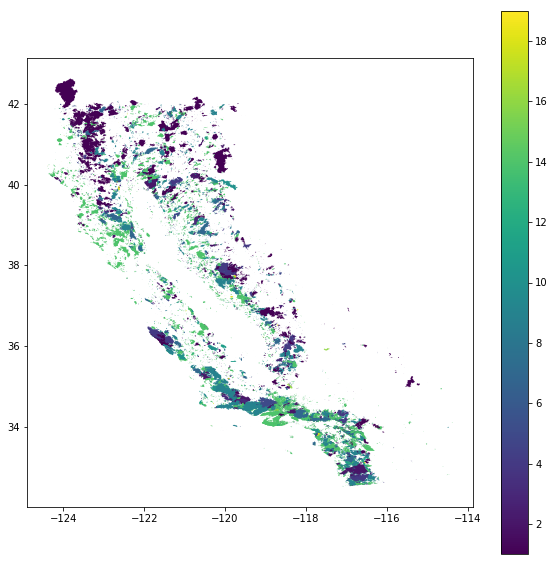

In [19]:
fire_peri.plot(column = "CAUSE", figsize=(10, 10), legend = True)

## Creating spatial clusters of Fire locations

### Visualizing just single row
#### Attribute info

In [20]:
row = fire_2017.iloc[0]
row

OBJECTID                                                  20104
YEAR_                                                      2017
STATE                                                        CA
AGENCY                                                      CCO
UNIT_ID                                                     VNC
FIRE_NAME                                                 BROOK
INC_NUM                                                00042450
ALARM_DATE                                  2017-05-23 00:00:00
CONT_DATE                               2017/05/24 00:00:00.000
CAUSE                                                        14
COMMENTS                                       per walked track
REPORT_AC                                                    10
GIS_ACRES                                               10.0438
C_METHOD                                                      1
OBJECTIVE                                                     1
FIRE_NUM                                

#### Geometry Info

Geometry of a Fire perimeter is a polygon

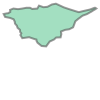

In [21]:
geom = row.geometry
geom

* Geometry type of the centroid of the polygon is always a point
* A point geometry has an X & Y value (longitude & latitude value)

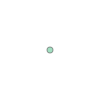

In [22]:
centroid = geom.centroid
centroid

In [23]:
centroid.x, centroid.y

(-118.84628616097514, 34.1338362548877)

#### Let's create a Shapely point geometry from our centroid. We'll check whether this point is within any of our fire polygons 

In [24]:

from shapely.geometry import Point
pt = Point(centroid.x, centroid.y)

#The first row should return True
fire_2017.geometry.contains(pt)

19484     True
19485    False
19486    False
19487    False
19488    False
19489    False
19490    False
19491    False
19492    False
19493    False
19494    False
19495    False
19496    False
19497    False
19498    False
19499    False
19500    False
19501    False
19502    False
19503    False
19504    False
19505    False
19506    False
19507    False
19508    False
19509    False
19510    False
19511    False
19512    False
19513    False
         ...  
20063    False
20064    False
20065    False
20066    False
20067    False
20068    False
20069    False
20070    False
20071    False
20072    False
20073    False
20074    False
20075    False
20076    False
20077    False
20078    False
20079    False
20080    False
20081    False
20082    False
20083    False
20084    False
20085    False
20086    False
20087    False
20088    False
20089    False
20090    False
20091    False
20092    False
Length: 607, dtype: bool

#### In case, the exterior coordoinates of the polygon is required, use this

In [25]:
list(zip(*geom.exterior.xy))

[(-118.84541971068873, 34.13449566459148),
 (-118.84518367551226, 34.13441573951472),
 (-118.84481889554485, 34.13430029289837),
 (-118.84473597629213, 34.13427852897905),
 (-118.84455090384353, 34.13432515191742),
 (-118.84441695064594, 34.13435567134409),
 (-118.84422638594492, 34.134399088378146),
 (-118.84402387924484, 34.1344779027051),
 (-118.84398766931402, 34.134477903445195),
 (-118.84397002841905, 34.13446544935303),
 (-118.84394207153815, 34.134445711404176),
 (-118.84401315070751, 34.13439797814489),
 (-118.84402074832208, 34.13439364789293),
 (-118.8440691781454, 34.13436604731967),
 (-118.8440949572819, 34.134351356005475),
 (-118.8441673776054, 34.13430362362069),
 (-118.84425186668469, 34.13425811031401),
 (-118.84435915544394, 34.134194836531336),
 (-118.84456163293622, 34.13412090003568),
 (-118.84462064146565, 34.13408093732544),
 (-118.84467428457639, 34.13403875490368),
 (-118.84476011557638, 34.13397659120157),
 (-118.84489759026516, 34.133863481322706),
 (-118.84

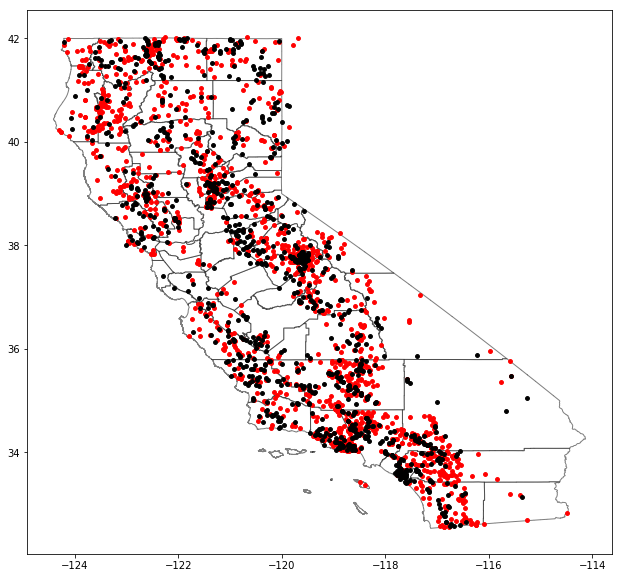

In [26]:
counties = gpd.read_file("CA_Counties.shp")
centroids = fire_peri[(fire_peri["YEAR_"] > 2010) & (fire_peri["YEAR_"] < 2016)].centroid
centroid_2017 = fire_peri[(fire_peri["YEAR_"] >= 2016) ].centroid

g, ax = plt.subplots(1, figsize=(15,10))
counties.plot(ax = ax, figsize=(15, 10), edgecolor='k', alpha = 0.5, facecolor='white')
centroids.plot(markersize = 15, ax = ax, color = 'R')

centroid_2017.plot(markersize = 15, ax = ax, color = 'K')

## Loading Landsat ARD Image

### Get ARD Catalog

In [27]:
ard_csv = pd.read_csv("ARD_TILE_306212.csv", encoding='ISO-8859-1')
ard_csv.tail(10)

,Tile Identifier,Acquisition Date,Tile Grid Region,Tile Grid Horizontal,Tile Grid Vertical,Tile Production Date,Cloud Cover,Cloud Shadow,Snow Ice,Fill (No Data),...,UL Corner Long dec,UR Corner Lat dec,UR Corner Long dec,LR Corner Lat dec,LR Corner Long dec,LL Corner Lat dec,LL Corner Long dec,Display ID,Ordering ID,Browse Link
54,LE07_CU_001009_20170613_20181122_C01_V01,2017/06/13,CU,1,9,2018/11/22,2.8110,0.2865,0.0000,57.3073,...,-121.875673,37.875083,-121.875673,37.875083,-123.986222,36.215538,-123.986222,LE07_CU_001009_20170613_20181122_C01_V01,LE07_CU_001009_20170613_20181122_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...
55,LE07_CU_002009_20170608_20181127_C01_V01,2017/06/08,CU,2,9,2018/11/27,17.8906,2.0210,0.0000,99.8579,...,-120.238242,38.229993,-120.238242,38.229993,-122.338660,36.586674,-122.338660,LE07_CU_002009_20170608_20181127_C01_V01,LE07_CU_002009_20170608_20181127_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...
56,LE07_CU_002010_20170608_20181130_C01_V01,2017/06/08,CU,2,10,2018/11/30,9.6921,0.9431,0.0000,79.7073,...,-119.816648,36.935621,-119.816648,36.935621,-121.875673,35.295601,-121.875673,LE07_CU_002010_20170608_20181130_C01_V01,LE07_CU_002010_20170608_20181130_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...
57,LC08_CU_001009_20170607_20181130_C01_V01,2017/06/07,CU,1,9,2018/11/30,100.0000,0.0000,0.0000,99.9775,...,-121.875673,37.875083,-121.875673,37.875083,-123.986222,36.215538,-123.986222,LC08_CU_001009_20170607_20181130_C01_V01,LC08_CU_001009_20170607_20181130_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...
58,LC08_CU_002009_20170607_20181130_C01_V01,2017/06/07,CU,2,9,2018/11/30,40.9654,2.4995,0.0003,25.1071,...,-120.238242,38.229993,-120.238242,38.229993,-122.338660,36.586674,-122.338660,LC08_CU_002009_20170607_20181130_C01_V01,LC08_CU_002009_20170607_20181130_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...
59,LC08_CU_002010_20170607_20181130_C01_V01,2017/06/07,CU,2,10,2018/11/30,19.1476,1.2264,0.0000,2.1995,...,-119.816648,36.935621,-119.816648,36.935621,-121.875673,35.295601,-121.875673,LC08_CU_002010_20170607_20181130_C01_V01,LC08_CU_002010_20170607_20181130_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...
60,LE07_CU_001009_20170606_20181130_C01_V01,2017/06/06,CU,1,9,2018/11/30,89.3464,0.3944,0.0000,38.2700,...,-121.875673,37.875083,-121.875673,37.875083,-123.986222,36.215538,-123.986222,LE07_CU_001009_20170606_20181130_C01_V01,LE07_CU_001009_20170606_20181130_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...
61,LE07_CU_002009_20170606_20181130_C01_V01,2017/06/06,CU,2,9,2018/11/30,7.6351,0.1945,0.0000,50.0461,...,-120.238242,38.229993,-120.238242,38.229993,-122.338660,36.586674,-122.338660,LE07_CU_002009_20170606_20181130_C01_V01,LE07_CU_002009_20170606_20181130_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...
62,LE07_CU_002010_20170606_20181130_C01_V01,2017/06/06,CU,2,10,2018/11/30,16.9115,0.0554,0.0000,91.5876,...,-119.816648,36.935621,-119.816648,36.935621,-121.875673,35.295601,-121.875673,LE07_CU_002010_20170606_20181130_C01_V01,LE07_CU_002010_20170606_20181130_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...
63,LC08_CU_001009_20170605_20181122_C01_V01,2017/06/05,CU,1,9,2018/11/22,25.1334,3.7928,0.0000,41.5144,...,-121.875673,37.875083,-121.875673,37.875083,-123.986222,36.215538,-123.986222,LC08_CU_001009_20170605_20181122_C01_V01,LC08_CU_001009_20170605_20181122_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...


### Query for best images in the catlog for an i/p location

In [28]:
input_location = (37.370285, -121.702842)

In [29]:
eligible_tiles = ard_csv[\
                         (ard_csv['LL Corner Lat dec'] < input_location[0] ) & \
                         (ard_csv['LL Corner Long dec'] < input_location[1] ) & \
                         (ard_csv['UR Corner Lat dec'] > input_location[0] ) & \
                         (ard_csv['UR Corner Long dec'] > input_location[1] ) \
                        ]


eligible_tiles

,Tile Identifier,Acquisition Date,Tile Grid Region,Tile Grid Horizontal,Tile Grid Vertical,Tile Production Date,Cloud Cover,Cloud Shadow,Snow Ice,Fill (No Data),...,UL Corner Long dec,UR Corner Lat dec,UR Corner Long dec,LR Corner Lat dec,LR Corner Long dec,LL Corner Lat dec,LL Corner Long dec,Display ID,Ordering ID,Browse Link
1,LE07_CU_002009_20170726_20181204_C01_V01,2017/07/26,CU,2,9,2018/12/04,2.5426,0.0817,0.0000,99.8581,...,-120.238242,38.229993,-120.238242,38.229993,-122.33866,36.586674,-122.33866,LE07_CU_002009_20170726_20181204_C01_V01,LE07_CU_002009_20170726_20181204_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...
4,LC08_CU_002009_20170725_20181127_C01_V01,2017/07/25,CU,2,9,2018/11/27,1.0168,0.1829,0.0000,25.5976,...,-120.238242,38.229993,-120.238242,38.229993,-122.33866,36.586674,-122.33866,LC08_CU_002009_20170725_20181127_C01_V01,LC08_CU_002009_20170725_20181127_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...
7,LE07_CU_002009_20170724_20181203_C01_V01,2017/07/24,CU,2,9,2018/12/03,7.8267,0.2713,0.0000,49.8837,...,-120.238242,38.229993,-120.238242,38.229993,-122.33866,36.586674,-122.33866,LE07_CU_002009_20170724_20181203_C01_V01,LE07_CU_002009_20170724_20181203_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...
10,LC08_CU_002009_20170718_20181127_C01_V01,2017/07/18,CU,2,9,2018/11/27,0.0000,0.0000,0.0000,99.9996,...,-120.238242,38.229993,-120.238242,38.229993,-122.33866,36.586674,-122.33866,LC08_CU_002009_20170718_20181127_C01_V01,LC08_CU_002009_20170718_20181127_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...
13,LE07_CU_002009_20170717_20181209_C01_V01,2017/07/17,CU,2,9,2018/12/09,0.1303,0.0207,0.0000,38.6676,...,-120.238242,38.229993,-120.238242,38.229993,-122.33866,36.586674,-122.33866,LE07_CU_002009_20170717_20181209_C01_V01,LE07_CU_002009_20170717_20181209_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...
16,LC08_CU_002009_20170716_20181130_C01_V01,2017/07/16,CU,2,9,2018/11/30,1.9568,1.6698,0.0000,33.8390,...,-120.238242,38.229993,-120.238242,38.229993,-122.33866,36.586674,-122.33866,LC08_CU_002009_20170716_20181130_C01_V01,LC08_CU_002009_20170716_20181130_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...
19,LE07_CU_002009_20170710_20181130_C01_V01,2017/07/10,CU,2,9,2018/11/30,1.2836,0.0000,0.0000,99.8308,...,-120.238242,38.229993,-120.238242,38.229993,-122.33866,36.586674,-122.33866,LE07_CU_002009_20170710_20181130_C01_V01,LE07_CU_002009_20170710_20181130_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...
22,LC08_CU_002009_20170709_20181130_C01_V01,2017/07/09,CU,2,9,2018/11/30,1.5239,0.0454,0.0000,25.5311,...,-120.238242,38.229993,-120.238242,38.229993,-122.33866,36.586674,-122.33866,LC08_CU_002009_20170709_20181130_C01_V01,LC08_CU_002009_20170709_20181130_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...
25,LE07_CU_002009_20170708_20181127_C01_V01,2017/07/08,CU,2,9,2018/11/27,0.7355,0.0615,0.0000,50.2207,...,-120.238242,38.229993,-120.238242,38.229993,-122.33866,36.586674,-122.33866,LE07_CU_002009_20170708_20181127_C01_V01,LE07_CU_002009_20170708_20181127_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...
28,LC08_CU_002009_20170702_20181127_C01_V01,2017/07/02,CU,2,9,2018/11/27,0.0000,0.0000,0.0000,99.9943,...,-120.238242,38.229993,-120.238242,38.229993,-122.33866,36.586674,-122.33866,LC08_CU_002009_20170702_20181127_C01_V01,LC08_CU_002009_20170702_20181127_C01_V01,https://earthexplorer.usgs.gov/browse-link/143...


#### Choose the best image satisfying all criteria for training

In [55]:
eligible_tiles.iloc[1]


Tile Identifier                       LC08_CU_002009_20170725_20181127_C01_V01
Acquisition Date                                                    2017/07/25
Tile Grid Region                                                            CU
Tile Grid Horizontal                                                         2
Tile Grid Vertical                                                           9
Tile Production Date                                                2018/11/27
Cloud Cover                                                             1.0168
Cloud Shadow                                                            0.1829
Snow Ice                                                                     0
Fill (No Data)                                                         25.5976
Spacecraft Identifier                                                LANDSAT_8
Sensor Identifier                                                     OLI/TIRS
Scene Count                                         

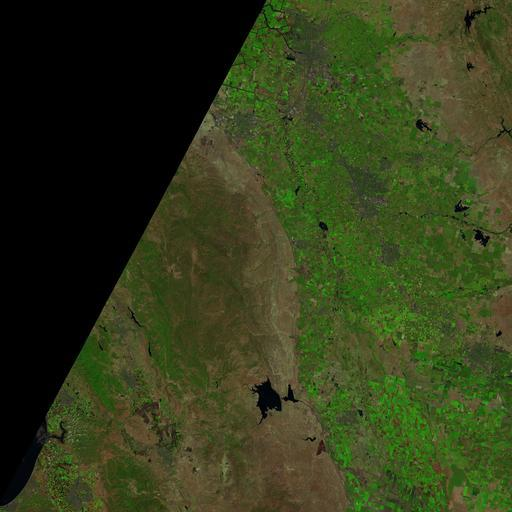

In [31]:
from IPython.display import Image
img = Image(filename='LC08_CU_002009_20170725_C01_V01.jpg') 
img

### Visualizing the Terrain Data

In [32]:

from matplotlib import cm
from osgeo import gdal


In [34]:
import numpy as np

(3612, 3612)


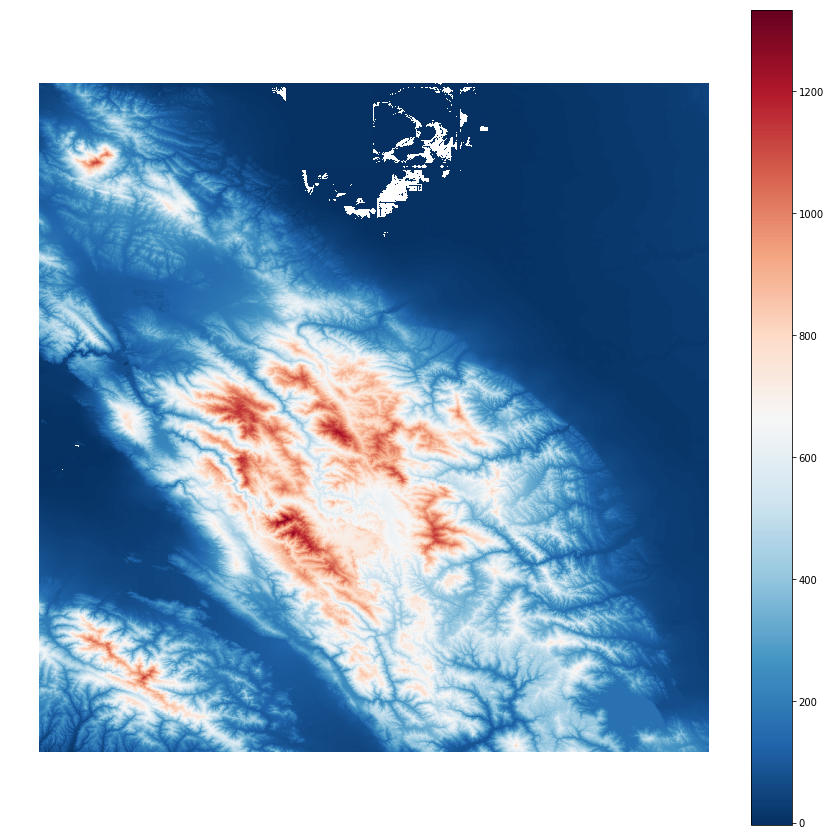

In [54]:
gdal.UseExceptions()

img_s = "imgn38w122_1.img"
geo = gdal.Open(img_s)
topo = geo.ReadAsArray()
i, j = np.where(topo>0)
topo = topo[min(i):max(i)+1, min(j):max(j)+1]
topo[topo==0] = np.nan
print (topo.shape)

fig = plt.figure(frameon=False, figsize= (15, 15))
plt.imshow(topo, cmap=cm.RdBu_r)
plt.axis('off')
cbar = plt.colorbar()
plt.show()

In [47]:
topo

array([[ 31.83672 ,  30.879496,  30.271606, ...,  43.9492  ,  43.90857 ,
         44.187477],
       [ 32.682953,  31.2784  ,  30.474218, ...,  44.280586,  44.33961 ,
         44.537033],
       [ 33.115143,  31.909876,  31.174133, ...,  44.916927,  45.001633,
         45.167194],
       ...,
       [ 59.368977,  62.457916,  65.46009 , ..., 188.1097  , 188.27461 ,
        188.3692  ],
       [ 59.463608,  66.3151  ,  73.55427 , ..., 189.58952 , 189.6813  ,
        189.49208 ],
       [ 67.60327 ,  71.61962 ,  79.22814 , ..., 190.33556 , 190.28633 ,
        189.98038 ]], dtype=float32)

Topo represents the height values